<a href="https://colab.research.google.com/github/ShubhamJadhav03/DeepLearning/blob/main/cnn_flower_image_classification_data_augmentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

<h3 style='color:purple'>Load flowers dataset</h3>

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [9]:
print(data_dir.exists())  # Should return True
print(data_dir.is_dir())  # Should return True


True
True


In [14]:
list(data_dir.glob('**/*.jpg')) [:5]

[PosixPath('datasets/flower_photos/flower_photos/sunflowers/6116210027_61923f4b64.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/15472217046_2699b25584.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/20410533613_56da1cce7c.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/20972866151_e6a928b00a.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/2328600790_90e2942557_n.jpg')]

In [19]:
image_count = len(list(data_dir.glob('**/*.jpg')))
print(image_count)

3670


In [20]:
roses = list(data_dir.glob('flower_photos/roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/7187035716_5d0fb95c31_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2300959680_8d22fa5ee2.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2788276815_8f730bd942.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/24781114_bc83aa811e_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/12238827553_cf427bfd51_n.jpg')]

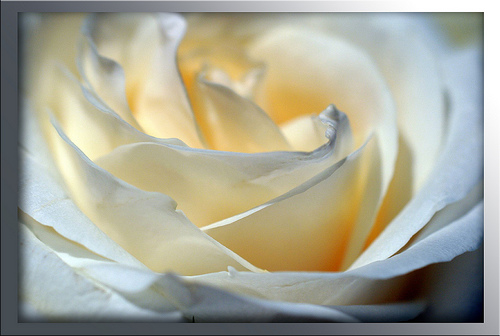

In [21]:
PIL.Image.open(str(roses[1]))

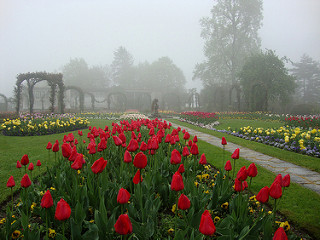

In [26]:
tulips = list(data_dir.glob('flower_photos/tulips/*'))
PIL.Image.open(str(tulips[5]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [27]:
flowers_images_dict = {
    'roses': list(data_dir.glob('flower_photos/roses/*')),
    'daisy': list(data_dir.glob('flower_photos/daisy/*')),
    'dandelion': list(data_dir.glob('flower_photos/dandelion/*')),
    'sunflowers': list(data_dir.glob('flower_photos/sunflowers/*')),
    'tulips': list(data_dir.glob('flower_photos/tulips/*')),
}

In [31]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [30]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/7187035716_5d0fb95c31_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2300959680_8d22fa5ee2.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2788276815_8f730bd942.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/24781114_bc83aa811e_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/12238827553_cf427bfd51_n.jpg')]

In [32]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/flower_photos/roses/7187035716_5d0fb95c31_n.jpg'

In [33]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [34]:
img.shape

(237, 320, 3)

In [35]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [36]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [37]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.35)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [40]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [41]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.3240 - loss: 1.6003
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5796 - loss: 1.0748
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6816 - loss: 0.8483
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7444 - loss: 0.6864
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8184 - loss: 0.5034
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8979 - loss: 0.3212
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9453 - loss: 0.1652
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9766 - loss: 0.0869
Epoch 9/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9882 - loss: 0.0518
Epoch 10/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9939 - loss: 0.0250
Epoch 11/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9977 - loss: 0.0160
Epoch 12/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy

In [42]:
model.evaluate(X_test_scaled,y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6352 - loss: 2.8433


[3.0717222690582275, 0.6311284303665161]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [43]:
predictions = model.predict(X_test_scaled)
predictions

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


array([[  2.4205701, -12.918614 ,  16.747868 , -25.395601 , -24.147228 ],
       [ -5.7492843,  -3.7952023,   1.0487201,  -4.6347246,  -3.5317595],
       [ -6.256961 ,   1.6770957,   7.4938655, -18.817757 ,  -6.4391065],
       ...,
       [ -4.7710147,  -5.2997165,   1.0699546,  -5.143698 ,  -3.4282413],
       [  7.6054144,  -1.4508796, -37.021603 ,  -6.0541744,  30.313417 ],
       [ 20.310793 , -11.526565 , -14.9454975,   4.4258633,   6.0564156]],
      dtype=float32)

In [46]:
score = tf.nn.softmax(predictions[0])

In [47]:
np.argmax(score)

2

In [48]:
y_test[0]

1

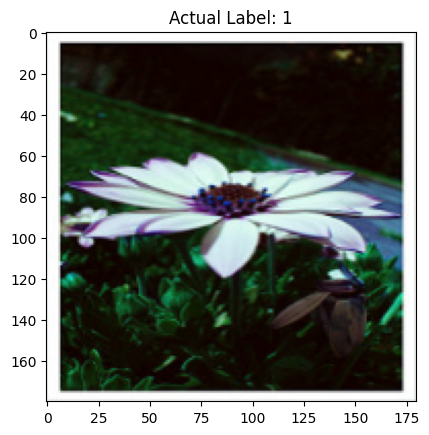

In [75]:
plt.imshow(X_test_scaled[0])
plt.title(f"Actual Label: {y_test[0]}")  # Display actual label as title
plt.show()

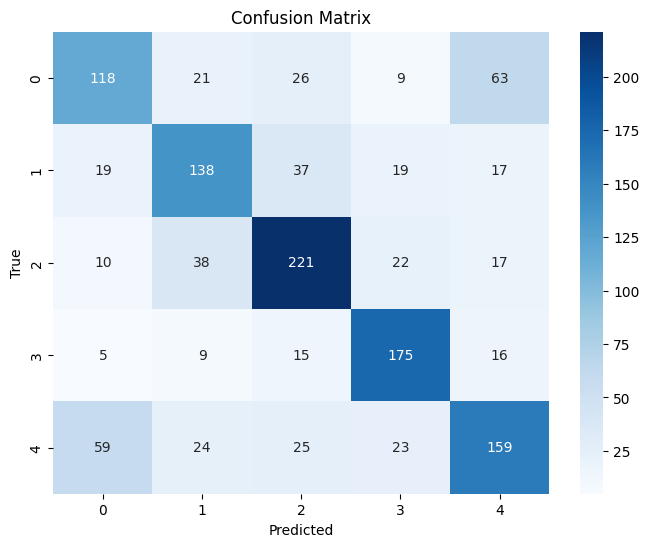

In [67]:
# prompt: create a confussion matrix to see models performance

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'y_test' and 'predictions' are available from the previous code
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [52]:
import keras
from keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Original Image**

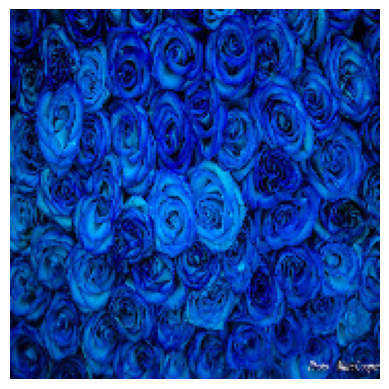

In [56]:
plt.axis('off')
plt.imshow(X[20])

**Newly generated training sample using data augmentation**

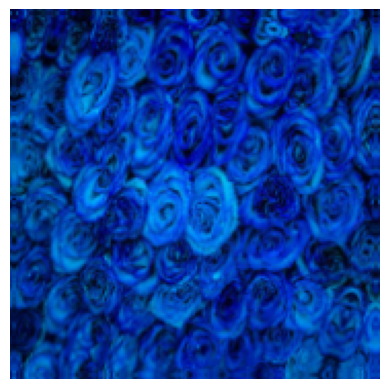

In [64]:
plt.axis('off')
plt.imshow(data_augmentation(X)[20].numpy().astype("uint8")) # why unint8? becaussse it can store number from 0 to 255(color range basically)

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [58]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.2969 - loss: 1.6366
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.4861 - loss: 1.1871
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5910 - loss: 1.0421
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6348 - loss: 0.9051
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6672 - loss: 0.8500
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6926 - loss: 0.7851
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7076 - loss: 0.7473
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7365 - loss: 0.6820
Epoch 9/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7623 - loss: 0.6441
Epoch 10/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7672 - loss: 0.6166
Epoch 11/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7480 - loss: 0.6222
Epoch 12/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy

In [65]:
model.evaluate(X_test_scaled,y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6770 - loss: 1.0377


[1.0656917095184326, 0.687159538269043]

In [68]:
predictions = model.predict(X_test_scaled)
predictions

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


array([[ 2.5488901e+00,  6.2502551e+00, -2.2946887e+00, -4.9549580e+00,
         5.0797224e+00],
       [ 1.1120081e+00, -1.8063392e-01,  1.1608691e+00, -2.4975164e+00,
         1.8522105e+00],
       [-1.0139145e+00, -6.1905873e-01,  3.4132094e+00, -4.7824039e+00,
        -1.8389568e+00],
       ...,
       [-1.0831181e+00,  2.5873380e-03,  1.8217729e+00, -1.2735475e+00,
        -1.4420743e+00],
       [ 7.7261219e+00, -3.2406874e+00, -1.0700528e+01, -2.7362466e-02,
         1.1658867e+01],
       [ 4.4883986e+00, -3.0558100e+00, -6.0260849e+00,  6.2134423e+00,
         5.4226780e+00]], dtype=float32)

In [86]:
score = tf.nn.softmax(predictions[0])
np.argmax(score)

1

In [87]:
y_test[0]

1

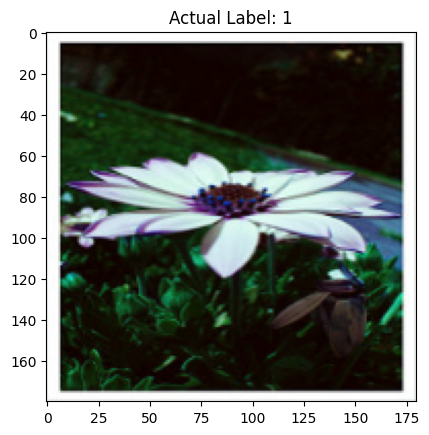

In [88]:
plt.imshow(X_test_scaled[0])
plt.title(f"Actual Label: {y_test[0]}")  # Display actual label as title
plt.show()

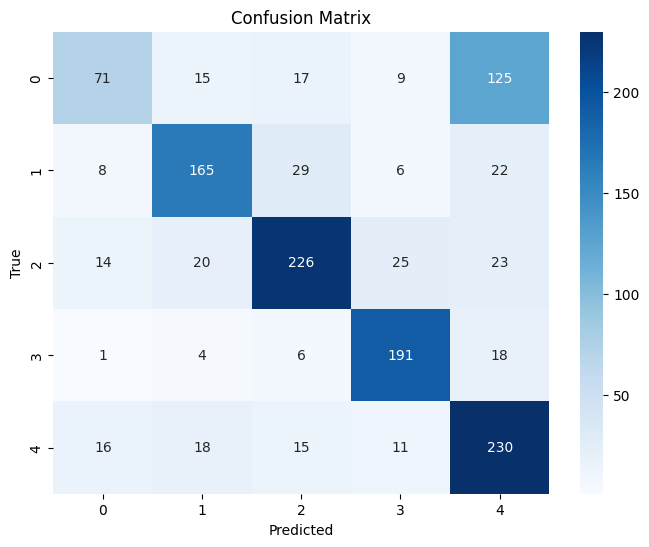

In [69]:
# prompt: create a confussion matrix to see models performance

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'y_test' and 'predictions' are available from the previous code
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
